In [59]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
df = pd.read_csv('C:/Users/Owner/Desktop/git/Advertising/라면 평가/ramen-ratings.csv')

In [61]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [62]:
df.tail()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN
2579,1,Westbrae,Miso Ramen,Pack,USA,0.5,NaN


In [63]:
df.describe()

,Review #
count,2580.000000
mean,1290.500000
std,744.926171
min,1.000000
25%,645.750000
50%,1290.500000
75%,1935.250000
max,2580.000000


In [64]:
df.shape

(2580, 7)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [66]:
df['Style'].value_counts()

Style
Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: count, dtype: int64

In [67]:
#NaN 컬럼 찾기
df.isna().any()

Review #    False
Brand       False
Variety     False
Style        True
Country     False
Stars       False
Top Ten      True
dtype: bool

In [68]:
df.isna().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

In [69]:
df['Top Ten'].fillna(0, inplace=True)

df[df.isnull().any(axis=1)]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2152,428,Kamfen,E Menm Chicken,NaN,China,3.75,0
2442,138,Unif,100 Furong Shrimp,NaN,Taiwan,3,0


In [70]:
df.drop(2152, axis=0,inplace=True)
df.drop(2442, axis=0,inplace=True)

In [71]:
df_with_Nan = df[df.isnull().any(axis=1)]

df_with_Nan

,Review #,Brand,Variety,Style,Country,Stars,Top Ten


In [72]:
for i in df_with_Nan.index:
    subDf = df.loc[(df['Brand']==df_with_Nan.loc[i,'Brand']) & (df['Country']==df_with_Nan.loc[i,'Country'])]
    mean = subDf['Stars'].mean()
    df.loc[i,'Stars'] = round(mean,2)

In [73]:
df.isna().sum()

Review #    0
Brand       0
Variety     0
Style       0
Country     0
Stars       0
Top Ten     0
dtype: int64

In [74]:
df[df['Top Ten'] != 0]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5,2016 #10
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5,2016 #1
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5,2016 #8
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5,2016 #5
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5,2016 #9
891,1689,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5,2016 #7
942,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5,2015 #10
963,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5,2015 #7
995,1585,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5,2015 #4
1059,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5,2015 #9


In [75]:
top_ten_with_n=df[df['Top Ten'] == '\n']
for i in top_ten_with_n.index:
    df.loc[i,'Top Ten']=0

In [76]:
years=['2012','2013','2014','2015','2016']
for y in years:
    df[y+'_rank']=np.nan

In [77]:
for rank in df['Top Ten'].values:
    for y in years:
        if re.search('^'+y,str(rank)):
            index = df[df['Top Ten']==rank].index.values
            rank_number = str(rank).split()[-1]
            df.loc[index,y+'_rank'] = int(''.join([i for i in rank_number if i.isdigit()]))
df.drop('Top Ten', axis=1, inplace=True)

In [78]:
df.fillna(0, inplace=True)

df.head()

,Review #,Brand,Variety,Style,Country,Stars,2012_rank,2013_rank,2014_rank,2015_rank,2016_rank
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,0.0,0.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0.0,0.0,0.0,0.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,0.0,0.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,0.0,0.0,0.0,0.0,0.0


In [79]:
df.isna().sum()

Review #     0
Brand        0
Variety      0
Style        0
Country      0
Stars        0
2012_rank    0
2013_rank    0
2014_rank    0
2015_rank    0
2016_rank    0
dtype: int64

In [80]:
df["2012_rank"].value_counts()

2012_rank
0.0     2569
10.0       1
7.0        1
5.0        1
3.0        1
6.0        1
9.0        1
1.0        1
2.0        1
4.0        1
Name: count, dtype: int64

In [81]:
df["2013_rank"].value_counts()

2013_rank
0.0     2571
10.0       1
1.0        1
2.0        1
4.0        1
9.0        1
3.0        1
6.0        1
Name: count, dtype: int64

In [82]:
df["2014_rank"].value_counts()

2014_rank
0.0     2570
7.0        1
4.0        1
9.0        1
10.0       1
8.0        1
5.0        1
6.0        1
1.0        1
Name: count, dtype: int64

In [83]:
df["2015_rank"].value_counts()

2015_rank
0.0     2571
10.0       1
7.0        1
4.0        1
9.0        1
6.0        1
1.0        1
8.0        1
Name: count, dtype: int64

In [84]:
df["2016_rank"].value_counts()

2016_rank
0.0     2572
10.0       1
1.0        1
8.0        1
5.0        1
9.0        1
7.0        1
Name: count, dtype: int64

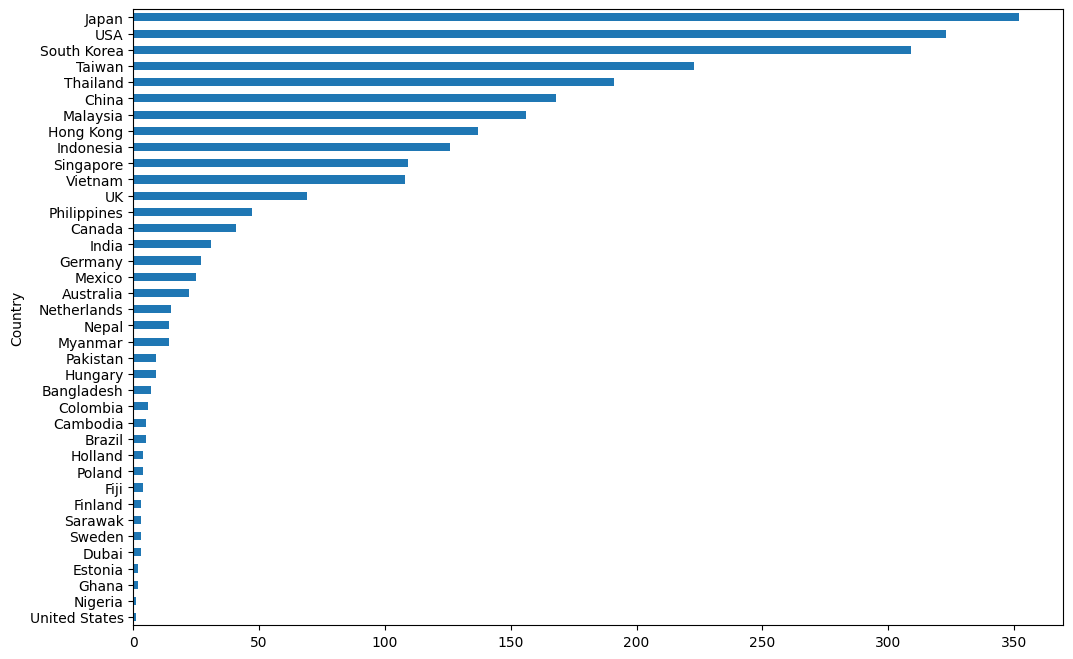

In [85]:
v = df.Country.value_counts()
v=v.sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(12,8))
v.plot(kind='barh')

plt.show()

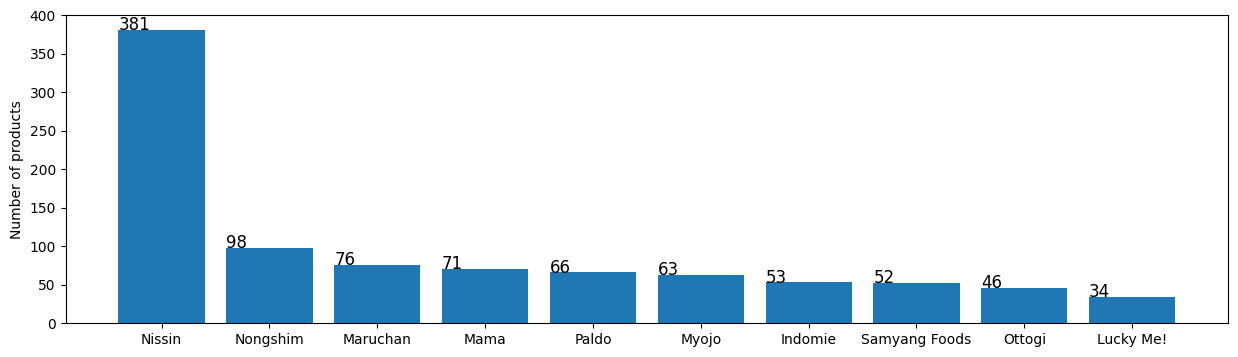

In [86]:
brands_name = df.Brand.value_counts()[:10].index
brand_size = df.Brand.value_counts()[:10].values

fig,ax=plt.subplots(figsize=(15,4))
ax.bar(brands_name, brand_size, data=df)
ax.set_ylabel('Number of products')
for p in ax.patches:
    an=ax.annotate(str(p.get_height()), xy=(p.get_x(),p.get_height()))
    an.set_size(12)

In [87]:
style=df.Style.value_counts()
style

Style
Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: count, dtype: int64

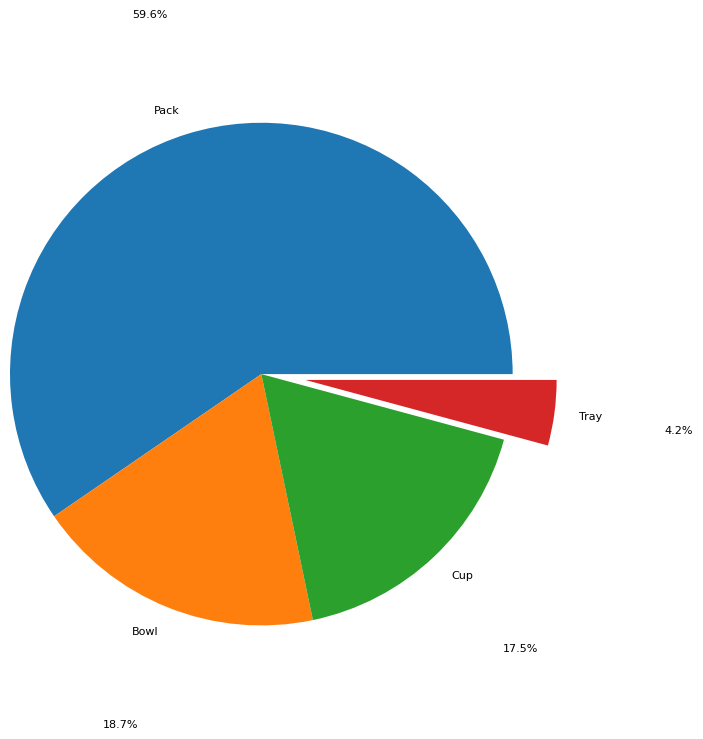

In [88]:
plt.pie(style[0:4],pctdistance=1.5,autopct="%2.01f%%",radius=1.7,labels=['Pack','Bowl','Cup','Tray'],
        explode=[0,0,0,0.3],
       textprops={'fontsize': 8})
plt.show()

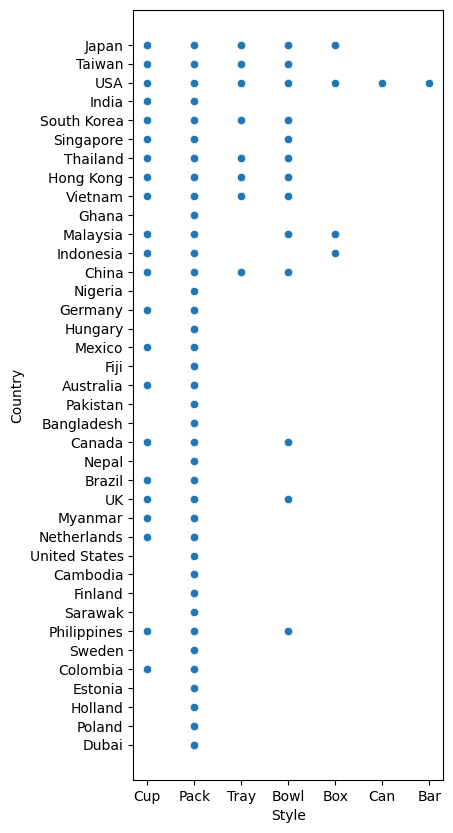

In [89]:
a4_dims = (4, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, data=df,y='Country',x='Style')
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_10412\387968296.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Stars'],hist=True,kde=True,bins=1)


ValueError: could not convert string to float: 'Unrated'

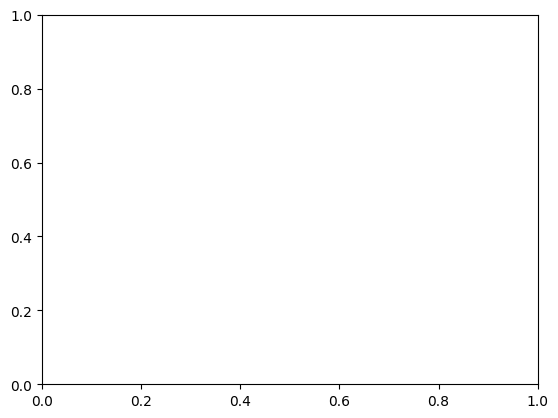

In [90]:
sns.distplot(df['Stars'],hist=True,kde=True,bins=1)
plt.show()

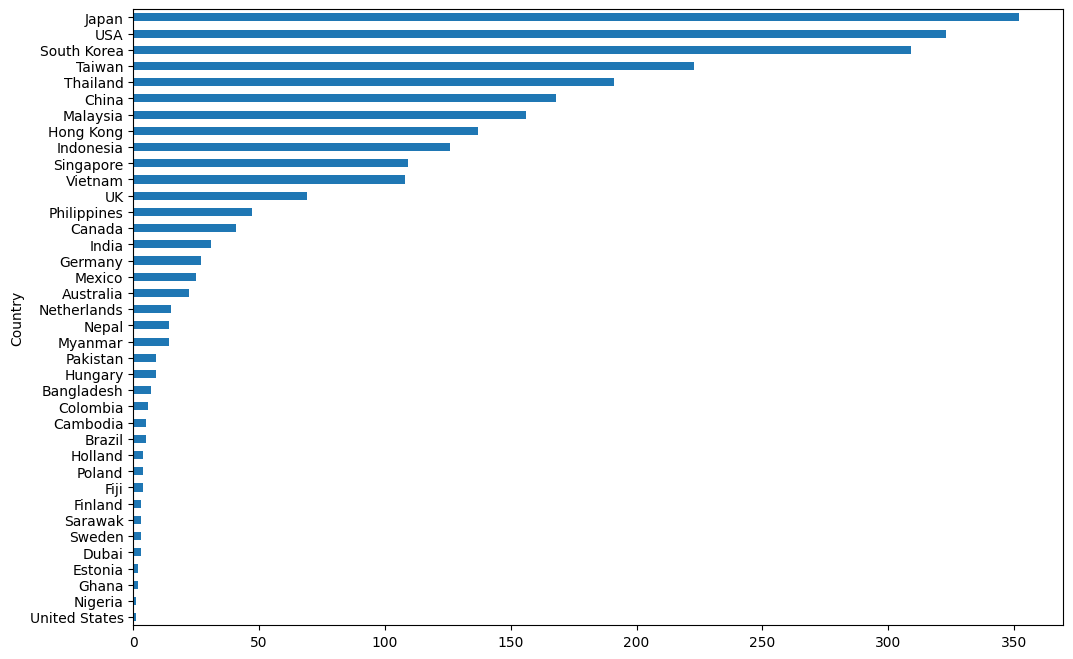

In [91]:
v = df.Country.value_counts()
v=v.sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(12,8))
v.plot(kind='barh')
plt.show()

In [94]:
# 팔도
sk1=df.loc[(df['Country'] == 'South Korea') & (df['Stars'] >= 4)& (df['Brand']=='Paldo')]
skb1=df.loc[(df['Country'] == 'South Korea') & (df['Stars'] < 4)& (df['Brand']=='Paldo')]
totsk1=sk1['Review #'].sum()
totskb1=skb1['Review #'].sum()
rev1 = totsk1,totskb1

#농심
sk2=df.loc[(df['Country'] == 'South Korea') & (df['Stars'] >= 4)& (df['Brand']=='Nongshim')]
skb2=df.loc[(df['Country'] == 'South Korea') & (df['Stars'] < 4)& (df['Brand']=='Nongshim')]
totsk2=sk2['Review #'].sum()
totskb2=skb2['Review #'].sum()
rev2 = totsk2,totskb2

#삼양
sk3=df.loc[(df['Country'] == 'South Korea') & (df['Stars'] >= 4)& (df['Brand']=='Samyang Foods')]
skb3=df.loc[(df['Country'] == 'South Korea') & (df['Stars'] < 4)& (df['Brand']=='Samyang Foods')]
totsk3=sk3['Review #'].sum()
totskb3=skb3['Review #'].sum()
rev3 = totsk3,totskb3
labels = 'Above 4.0','Below 4.0'
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0) 
fig ,ax=plt.subplots(1,3,figsize=(15,15))
ax[0].pie(rev1, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[1].pie(rev2, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[2].pie(rev3, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[0].set_title('PALDO',fontsize=15)
ax[1].set_title('NONGSHIM',fontsize=15)
ax[2].set_title('SAMYANG FOODS',fontsize=15)
plt.show()

TypeError: '>=' not supported between instances of 'str' and 'int'